In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/colonpolyp/pathoImagesWithLabels.xlsx'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

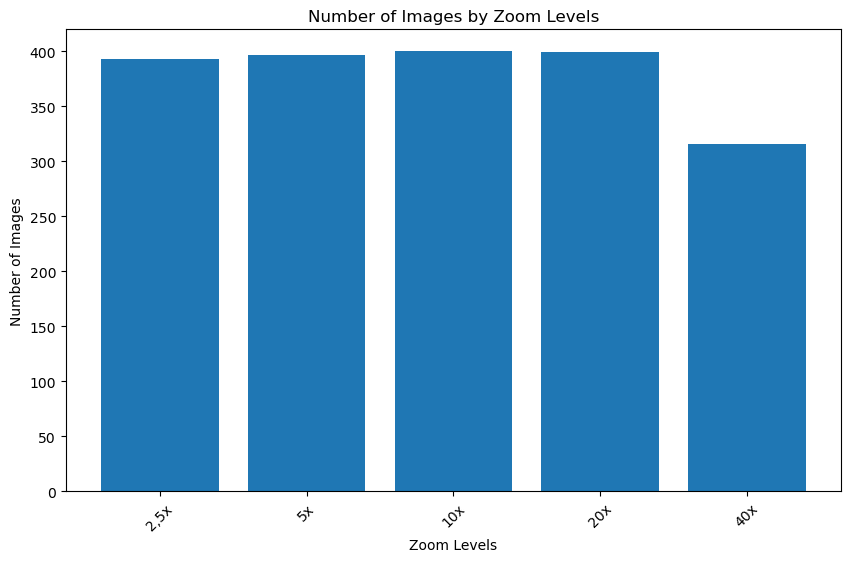

In [3]:
import matplotlib.pyplot as plt

subfolders = ['2,5x', '5x', '10x', '20x', '40x']
image_counts = [393, 397, 400, 399, 316]

plt.figure(figsize=(10, 6))
plt.bar(subfolders, image_counts)
plt.xlabel('Zoom Levels')
plt.ylabel('Number of Images')
plt.title('Number of Images by Zoom Levels')
plt.xticks(rotation=45)
plt.show()

This code reads the Excel file 'pathoImagesWithLabels.xlsx' and extracts the necessary columns. It then calculates the number of unique patients (unique_patient_count) and the number of unique polyps (unique_polyp_count). Finally, it calculates the number of unique polyps per patient (polyp_count_per_patient) and the total number of unique polyps (total_unique_polyp_count).

In [1]:
import pandas as pd

df = pd.read_excel('/kaggle/input/colonpolyp/pathoImagesWithLabels.xlsx', sheet_name='Sheet1')

# Find the number of unique patients
unique_patient_count = df["patient"].nunique()

# Find the number of unique polyps
unique_polyp_count = df["polyp"].nunique()

# Print the results
print("Total Unique Patient Count:", unique_patient_count)
print("Total Unique Polyp Count:", unique_polyp_count)


# Calculate the number of unique polyps per patient
polyp_count_per_patient = df.groupby("patient")["polyp"].nunique()

# Calculate the total number of unique polyps
total_unique_polyp_count = polyp_count_per_patient.sum()

# Print the results
print("Total Unique Polyp Count (Per Patient):", total_unique_polyp_count)


Total Unique Patient Count: 198
Total Unique Polyp Count: 15
Total Unique Polyp Count (Per Patient): 383


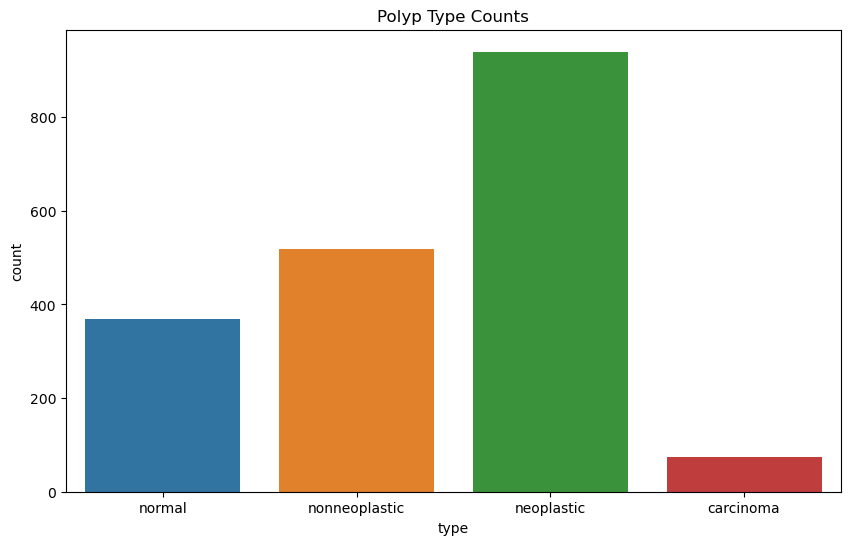

neoplastic       940
nonneoplastic    519
normal           370
carcinoma         74
Name: type, dtype: int64


In [18]:
import seaborn as sns
# Bar plot showing the count of polyp types
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='type')
plt.title('Polyp Type Counts')


output_path = '/kaggle/working/polyp_type_counts.png' 
plt.savefig(output_path, bbox_inches='tight', dpi=300) # bbox_inches='tight' kenar boşluklarını ayarlar, dpi çözünürlüğü artırır.
plt.show()

df.loc[df['type'] == 'carcinom', 'type'] = 'carcinoma'
# Calculate the counts of polyp types
polyp_type_counts = df['type'].value_counts()

# Print the results
print(polyp_type_counts)

In [9]:
df.loc[df['subtype'] == 'serrated', 'subtype'] = 'hyperplastic'
df.loc[df['subtype'] == 'inflammation', 'subtype'] = 'hyperplastic'
df.loc[df['subtype'] == 'nonspesific', 'subtype'] = 'hyperplastic'

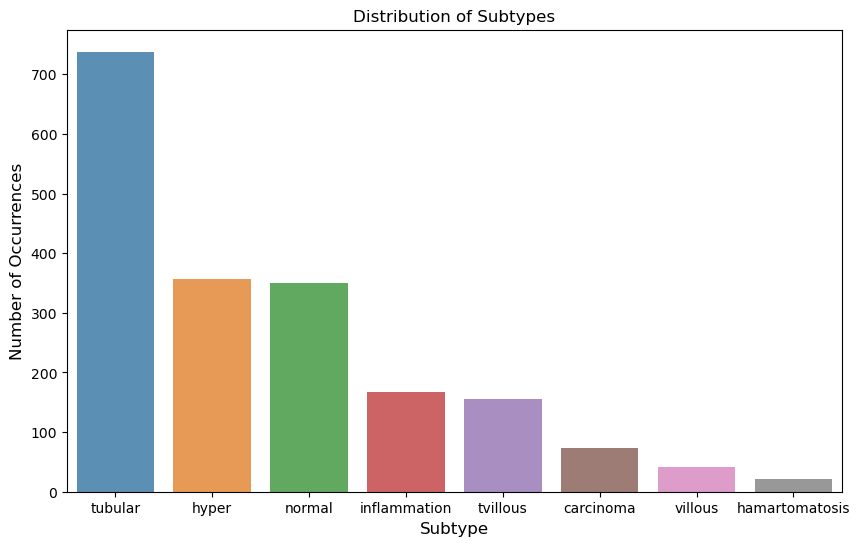

          subtype  count
0       carcinoma     74
1  hamartomatosis     21
2           hyper    356
3    inflammation    167
4          normal    350
5         tubular    738
6        tvillous    155
7         villous     42


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the distribution of values in the 'subtype' column
subtype_distribution = df['subtype'].value_counts()
df.loc[df['subtype'] == 'carcinom', 'subtype'] = 'carc'
df.loc[df['subtype'] == 'inflamatuar', 'subtype'] = 'inf'
df.loc[df['subtype'] == 'hyperplastic', 'subtype'] = 'hyper'
df.loc[df['subtype'] == 'tubulovillous', 'subtype'] = 'tvillous'
df.loc[df['subtype'] == 'nonspesific', 'subtype'] = 'hyper'
df.loc[df['subtype'] == 'serrated', 'subtype'] = 'hyper'
df.loc[df['subtype'] == 'tubuvillous', 'subtype'] = 'tvillous'



# Get the names and counts of the subtypes as separate lists
subtypes = subtype_distribution.index.tolist()
counts = subtype_distribution.values.tolist()

# Create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=subtypes, y=counts, alpha=0.8)

plt.title('Distribution of Subtypes')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Subtype', fontsize=12)
output_path = '/kaggle/working/polyp_type_counts.png' 
plt.savefig(output_path, bbox_inches='tight', dpi=300) # bbox_inches='tight' kenar boşluklarını ayarlar, dpi çözünürlüğü artırır.

plt.show()


import pandas as pd

# Perform grouping to count polyp subtypes
polyp_subtype_counts = df.groupby('subtype').size().reset_index(name='count')

# Print the results using DataFrame
print(polyp_subtype_counts)

In [5]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score

# Read the data
pathology_reports = pd.read_excel('/kaggle/input/colonpolyp/pathoImagesWithLabels.xlsx', sheet_name='forKappa')
ihc_reports = pd.read_excel('/kaggle/input/colonpolyp/pathoImagesWithLabels.xlsx', sheet_name='forKappa')

# Extract the 'subtype' columns
pathology_subtype = pathology_reports['subtypePathology']
ihc_subtype = ihc_reports['subtypeIHK']

# First, create a DataFrame that pairs the 'subtype' columns from both DataFrames
paired_subtypes = pd.DataFrame({
    'pathology_subtype': pathology_subtype,
    'ihc_subtype': ihc_subtype
})

# Drop rows where either value is NaN
paired_subtypes = paired_subtypes.dropna()

# Now you can calculate Cohen's Kappa on the remaining pairs
kappa = cohen_kappa_score(paired_subtypes['pathology_subtype'], paired_subtypes['ihc_subtype'])

print("Cohen's Kappa:", kappa)


Cohen's Kappa: 0.8745125588465227
